In [ ]:
# prompt: podłączenie dysku

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, f1_score, balanced_accuracy_score, matthews_corrcoef
from sklearn.cluster import DBSCAN
#from imblearn.under_sampling import RandomUnderSampler


In [ ]:
pip install hvplot


In [ ]:
import hvplot.pandas

Spis tereści  
4. [Klasteryzacja](#4)  
    4.1 [Wczytanie danych](#41)  
    4.2 [Ogólna analiza wszystkich zmiennych](#42)  
    4.2.1 [Wybór zmiennych do analizy](#421)  
    4.3 [Przygotowanie danych](#43)  
    4.3.1 [Przekształcenie na zmienne numeryczne](#431)  
    4.3.2 [Ocena wartości odstających metodą Zscore](#432)  
    4.3.3 [Standaryzacja](#433)  
    4.3.3.1 [StandartScaler](#4331)  
    4.3.3.2 [Normalizacja MinMaxScaler](#4332)  
    4.3.3.3 [RobustScaler](#4333)  
    4.3.3.4 [QuantileTransformer](#4334)  
    4.3.4 [Utworzenie zbioru wystandaryzowanego](#434)  
    4.3.5 [Redukcja wymiarowości](#435)  
    4.4 [Klasteryzacja](#44)  
    4.4.1 [Metoda K-Means](#441)  
    4.4.1.1 [Utworzenie klastrów](#4411)  
    4.4.1.2 [Analiza klastrów](#4412)  
    4.4.2 [Metoda hierarchiczna](#4421)   
    4.4.2.1 [Utworzenie klastrów](#4421)  
    4.4.2.2 [Analiza klastrów](#4422)  
    4.4.3 [Metoda DBSCAN](#443)  
    4.5 [Podsumowanie](#45)  





#### <a name = '4'></a> 4. Klasteryzacja

#### <a name = '41'></a> 4.1 Wczytanie danych

In [ ]:
data_row = pd.read_csv('/content/drive/My Drive/Future_Collars/Loan_data_new_features.csv')

In [ ]:
data = data_row.copy()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### <a name = '42'></a> 4.2 Ogólna analiza wszystkich zmiennych



In [ ]:
len(data_row.columns)

73

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,42531.0,NaN,NaN,NaN,11090.17305,7411.137529,500.0,5200.0,9700.0,15000.0,35000.0
funded_amnt,42531.0,NaN,NaN,NaN,10822.011004,7147.112309,500.0,5000.0,9600.0,15000.0,35000.0
funded_amnt_inv,42531.0,NaN,NaN,NaN,10140.582662,7131.587121,0.0,4950.0,8500.0,14000.0,35000.0
term,42531,2,36 months,31530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,42531.0,NaN,NaN,NaN,12.16562,3.709121,5.4,9.6,12.0,14.7,24.6
installment,42531.0,NaN,NaN,NaN,322.634879,208.933353,15.67,165.52,277.71,428.275,1305.19
grade,42531,7,B,12389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,42531.0,NaN,NaN,NaN,1.976097,1.419525,0.1,1.1,1.5,3.1,6.5
emp_length,42531,12,10+ years,9369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,42531,4,RENT,20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
col_num = data.select_dtypes(include = ['number']).columns.tolist()

In [ ]:
data[col_num].corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=1000, height=600,
    title="Korelacja pomiędzy 'loan status i zmiennymi numerycznymi",
    ylabel='Korelacja', xlabel='zmienne numeryczne',
)

:Bars   [index]   (loan_status)

Dla wszystkich zmiennych numerycznych bez wzgledu na obróbkę współczynnik korelacji z targetem nie prezkracza 0.2

#### <a name = '421'></a> 4.2.1 Wybór zmiennych do analizy

In [ ]:
col_new_3 = ['loan_amnt_out', 'funded_amnt_out', 'funded_amnt_inv_out'
 , 'term', 'int_rate', 'installment_trans', 'grade_num', 'home_ownership',
             'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths_trans',
  'open_acc', 'pub_rec_bin', 'revol_bal_trans', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
 'fico_value', 'mths_since_last_record', 'annual_inc_cat',
  'emp_length_bin', 'mths_since_last_delinq',
  'funded_to_loan_amnt_ratio',
 'funded_income_ratio', 'age_of_credit_lin', 'funded_inv_to_tot_ratio', 'mth_inc',
 'mth_install_to_incom', 'acc_hist','pub_rec_type', 'other_debt',
 'mth_debt_installment', 'fico_int_rate', 'funded_amnt_fico', 'dti_ratio_per_grade',
 'dti_ratio_per_purpose', 'mean_funded_addr_state', 'mean_annu_addr_state', 'mean_fico_addr_state',
 'desc_len', 'consolidation']


Sprawdzono wiele różnych kombinacji zmiennych i najlepsze rezultaty osiągnięto dla zestawu col_new_3

In [ ]:
col_3 = [  'term',  'emp_length_bin', 'home_ownership',
       'verification_status',  'loan_status',
       'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record',  'pub_rec',
       'revol_util',  'pub_rec_bankruptcies',
       'grade_num', 'fico_value',
      'annual_inc_out',  'funded_amnt_out',

      'int_rate_out', 'installment',
       'open_acc',  'revol_bal', 'total_acc',
       'funded_to_loan_amnt_ratio',
       'age_of_credit_lin', 'funded_income_ratio', 'funded_inv_to_tot_ratio',
       'mth_inc', 'mth_install_to_incom', 'acc_hist',
       'pub_rec_type', 'other_debt', 'mth_debt_installment', 'fico_int_rate',
       'funded_amnt_fico', 'dti_ratio_per_grade', 'dti_ratio_per_purpose',
       'mean_funded_addr_state', 'mean_annu_addr_state',
       'mean_fico_addr_state', 'desc_len', 'consolidation']

In [ ]:
col_pca = ['fico_value', 'funded_inv_to_tot_ratio', 'mths_since_last_record', 'annual_inc_out',  'mths_since_last_delinq', 'emp_length_bin',
         'mean_fico_addr_state',  'age_of_credit_lin', 'funded_to_loan_amnt_ratio', 'dti', 'funded_amnt_out', 'funded_amnt_fico', 'pub_rec',
           'pub_rec_bankruptcies', 'revol_util', 'mth_install_to_incom', 'inq_last_6mths',
         'funded_income_ratio', 'dti_ratio_per_grade', 'int_rate_out', 'fico_int_rate', 'term', 'grade',
 'home_ownership', 'purpose', 'mths_since_last_delinq_cat', 'pub_rec_type', 'loan_status']

In [ ]:
data = data[col_new_3]

In [ ]:
#Zamrożenie danych do analizy klastrów
data_clas = data.copy()

#### <a name = '43'></a> 4.3 Przygotowanie danych

#### <a name = '431'></a> 4.3.1 Przekształcenie na zmienne numeryczne

In [ ]:
data = pd.get_dummies(data, drop_first = True)


In [ ]:
bool_columns = data.select_dtypes(include=['bool']).columns.tolist()
for col in bool_columns:
    data[col] = data[col].astype(int)

In [ ]:
data.shape

(42531, 64)

#### <a name = '432'></a> 4.3.2 Ocena wartości odstających metodą Zscore

In [ ]:
z = np.abs(stats.zscore(data))

In [ ]:
z.head()

,loan_amnt_out,funded_amnt_out,funded_amnt_inv_out,int_rate,installment_trans,grade_num,loan_status,dti,delinq_2yrs,inq_last_6mths_trans,open_acc,pub_rec_bin,revol_bal_trans,revol_util,total_acc,pub_rec_bankruptcies_bin,fico_value,mths_since_last_record,emp_length_bin,funded_to_loan_amnt_ratio,funded_income_ratio,age_of_credit_lin,funded_inv_to_tot_ratio,mth_inc,mth_install_to_incom,acc_hist,other_debt,mth_debt_installment,fico_int_rate,funded_amnt_fico,dti_ratio_per_grade,dti_ratio_per_purpose,mean_funded_addr_state,mean_annu_addr_state,mean_fico_addr_state,desc_len,consolidation,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,annual_inc_cat_Q2-Q3,annual_inc_cat_Q3-upper,annual_inc_cat_high_outlier,annual_inc_cat_low-Q1,annual_inc_cat_low_outlier,mths_since_last_delinq_cat_>24,mths_since_last_delinq_cat_brak,pub_rec_type_rec_with_bankr,pub_rec_type_rec_without_bankr
0,0.840828,0.830491,0.744675,0.422105,0.718480,0.466506,0.422071,2.122617,0.297424,0.598438,1.411319,NaN,0.376163,1.220446,1.132343,NaN,0.606770,0.300211,0.163852,0.204567,0.218908,1.921245,0.315010,1.248391,0.385585,0.744885,0.310004,0.099946,0.136529,0.840045,0.018368,0.860629,0.502309,0.348311,0.201024,0.537032,0.470029,0.590682,0.057468,0.287689,1.052367,0.565521,1.468750,2.601035,0.932247,0.100108,0.28519,0.100586,0.239706,0.134253,0.12252,0.340597,0.049985,0.221671,0.097438,0.15549,0.572327,0.562298,0.099628,1.762639,0.092005,0.546894,0.761437,0.214393,0.109839
1,1.191614,1.191646,1.110019,0.845056,1.847262,0.228717,2.369269,1.839857,0.297424,1.546559,1.411319,NaN,0.989475,1.401728,1.563773,NaN,0.744960,0.300211,0.163852,0.204567,0.892347,0.140322,0.341247,1.066746,1.054953,1.459859,1.385296,0.772908,0.682492,1.184688,0.575437,1.502750,0.177546,0.174999,0.717317,0.836032,0.470029,1.692957,0.057468,0.287689,1.052367,1.768281,0.680851,0.384462,0.932247,0.100108,0.28519,0.100586,0.239706,0.134253,0.12252,0.340597,0.049985,0.221671,0.097438,0.15549,0.572327,0.562298,0.099628,1.762639,0.092005,0.546894,0.761437,0.214393,0.109839
2,1.205645,1.206092,1.124780,1.033783,1.493015,0.228717,0.422071,0.692004,0.297424,1.007422,1.633793,NaN,0.696878,1.742764,1.046057,NaN,0.606770,0.300211,0.163852,0.204567,0.108254,0.517792,0.341247,1.604054,0.414657,1.450403,1.255139,0.585908,0.777287,1.196075,0.575437,1.416447,0.739560,0.012253,0.201024,0.682260,0.470029,0.590682,0.057468,0.287689,1.052367,0.565521,0.680851,0.384462,0.932247,0.100108,0.28519,0.100586,0.239706,0.134253,0.12252,0.340597,0.049985,4.511198,0.097438,0.15549,0.572327,0.562298,0.099628,0.567331,10.868967,0.546894,0.761437,0.214393,0.109839
3,0.139255,0.108180,0.002916,0.359761,0.316931,0.228717,0.422071,0.985171,0.297424,0.598438,0.145999,NaN,0.303413,0.992344,1.283661,NaN,0.636938,0.300211,0.163852,0.204567,0.173735,0.309738,0.341247,0.485479,0.418742,1.078576,0.231215,0.186954,0.574913,0.066326,0.575437,0.666273,0.420028,0.729712,0.660194,0.246576,0.470029,0.590682,0.057468,0.287689,1.052367,1.768281,0.680851,0.384462,0.932247,0.100108,0.28519,0.100586,0.239706,0.134253,0.12252,2.936021,0.049985,0.221671,0.097438,0.15549,0.572327,0.562298,0.099628,0.567331,0.092005,1.828509,1.313307,0.214393,0.109839
4,1.121457,1.119415,1.036212,0.144073,1.721991,0.466506,0.422071,0.678879,0.297424,1.045057,1.258369,NaN,1.052278,0.168753,1.369947,NaN,0.498749,0.300211,0.163852,0.204567,1.299807,0.324257,0.341247,0.446969,1.399750,0.419975,1.003992,4.276566,0.433839,1.090339,0.018368,0.666273,1.300005,1.817383,0.660194,0.043880,0.470029,1.692957,0.057468,0.287689,1.052367,1.768281,0.680851,0.384462,0.932247,0.100108,0.28519,0.100586,0.239706,0.134253,0.12252,2.936021,0.049985,0.221671

In [ ]:
np.where(z > 3)

(array([    2,     2,     4, ..., 42528, 42529, 42530]),
 array([53, 60, 27, ..., 60, 22, 22]))

In [ ]:
data_outliers_removed = data[(z<3).all(axis = 1)]

In [ ]:
data_outliers_removed.shape # tyle pozostałoby wartosci po usunieciu outlierów z df pierwotnego

(0, 65)

In [ ]:
#Rozkład predykcji w części zbioru która nie zawiera wartości odstającyh
data_outliers_removed['loan_status'].value_counts()

,count
loan_status,


#### <a name = '433'></a> 4.3.3 Standaryzacja

In [ ]:
x_s = data.drop(columns = 'loan_status')
y_s = data['loan_status']

In [ ]:
x_s.shape

(42531, 64)

#### <a name = '4331'></a> 4.3.3.1 StandartScaler

In [ ]:
scaler = StandardScaler()
x_s_scaled = scaler.fit_transform(x_s)

#### <a name = '4331'></a> 4.3.3.2 Normalizacja MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x_s_scaled = scaler.fit_transform(x_s)

#### <a name = '4333'></a> 4.3.3.3 RobustScaler

In [ ]:
scaler = RobustScaler()
x_s_scaled = scaler.fit_transform(x_s)

#### <a name = '4334'></a> 4.3.3.4 QuantileTransformer

In [ ]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
x_s_scaled = quantile_transformer.fit_transform(x_s)

#### <a name = '434'></a> 4.3.4 Utworzenie zbioru wystandaryzowanego

In [ ]:
x_s_scaled[:5, :5]

array([[-0.47959184, -0.46      , -0.38950276, -0.2745098 , -0.52852694],
       [-0.73469388, -0.71      , -0.66298343,  0.64705882, -1.3425343 ],
       [-0.74489796, -0.72      , -0.67403315,  0.78431373, -1.08707323],
       [ 0.03061224,  0.04      ,  0.16574586,  0.29411765,  0.21814731],
       [-0.68367347, -0.66      , -0.60773481,  0.1372549 , -1.25219634]])

In [ ]:
x_s_scaled_df = pd.DataFrame(x_s_scaled, columns = x_s.columns)

In [ ]:
x_s_scaled_df.head()

,loan_amnt_out,funded_amnt_out,funded_amnt_inv_out,int_rate,installment_trans,grade_num,dti,delinq_2yrs,inq_last_6mths_trans,open_acc,pub_rec_bin,revol_bal_trans,revol_util,total_acc,pub_rec_bankruptcies,fico_value,mths_since_last_record,emp_length_bin,mths_since_last_delinq,funded_to_loan_amnt_ratio,funded_income_ratio,age_of_credit_lin,funded_inv_to_tot_ratio,mth_inc,mth_install_to_incom,acc_hist,other_debt,mth_debt_installment,fico_int_rate,funded_amnt_fico,dti_ratio_per_grade,dti_ratio_per_purpose,mean_funded_addr_state,mean_annu_addr_state,mean_fico_addr_state,desc_len,consolidation,term_ 60 months,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,annual_inc_cat_Q2-Q3,annual_inc_cat_Q3-upper,annual_inc_cat_high_outlier,annual_inc_cat_low-Q1,annual_inc_cat_low_outlier,pub_rec_type_rec_with_bankr,pub_rec_type_rec_without_bankr
0,-0.479592,-0.46,-0.389503,-0.274510,-0.528527,0.0,1.353053,0.0,0.000000,-1.000000,0.0,0.304491,0.726496,-0.6875,0.0,0.454545,0.0,0.0,0.000000,0.0,0.312804,1.8000,-0.24,-0.823529,0.439175,-0.435897,-0.106127,0.532912,0.338952,-0.476915,0.000000,0.047244,-0.805226,-0.407874,0.000000,-0.197183,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.734694,-0.71,-0.662983,0.647059,-1.342534,0.5,-1.189885,0.0,0.461940,-1.000000,0.0,-0.871459,-0.861111,-1.0000,0.0,0.545455,0.0,0.0,0.000000,0.0,-0.540298,0.0250,0.06,-0.682353,-0.658455,1.198718,-0.963046,-0.702893,-0.347622,-0.737854,0.793103,-1.354331,-0.092637,-0.108268,0.666667,1.267606,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.744898,-0.72,-0.674033,0.784314,-1.087073,0.5,-0.453244,0.0,0.199263,-1.166667,0.0,-0.619503,1.042735,-0.6250,0.0,0.454545,0.0,0.0,0.000000,0.0,0.227856,-0.3000,0.06,-1.099953,0.461326,-0.958974,-0.859322,-0.438135,-0.427087,-0.746475,0.793103,-1.303150,0.496437,-0.201444,0.000000,-0.352113,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.030612,0.04,0.165746,0.294118,0.218147,0.5,0.623092,0.0,0.000000,0.166667,0.0,-0.280691,-0.613248,1.0625,0.0,-0.363636,0.0,0.0,-1.039216,0.0,0.278125,0.4125,0.06,-0.230588,0.464439,-0.683299,0.325180,0.126713,-0.257439,0.108891,0.793103,-0.858268,0.161520,0.209318,-0.333333,0.112676,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.683673,-0.66,-0.607735,0.137255,-1.252196,0.0,0.426527,0.0,-0.800737,1.000000,0.0,0.886694,0.089744,1.1250,0.0,-0.272727,0.0,0.0,-1.027451,0.0,-0.853102,0.4250,0.06,0.494118,-0.921176,-0.195007,0.941019,6.446262,-0.139179,-0.666419,0.000000,-0.858268,-1.641330,-1.248950,-0.333333,0.422535,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <a name = '435'></a> 4.3.5 Redukcja wymiarowości PCA

*Dane do PCA otrzymane poprzez ponowne wyskalowanie metodą RobustScaler*

In [ ]:
pca = PCA(n_components =3)

In [ ]:
X_pca = pca.fit_transform(x_s_scaled_df)

In [ ]:
# Wyjaśniona wariancja przez każdą z głównych składowych
print("Wyjaśniona wariancja przez składowe: ", pca.explained_variance_ratio_)

Wyjaśniona wariancja przez składowe:  [0.97346316 0.02212361 0.00098735]


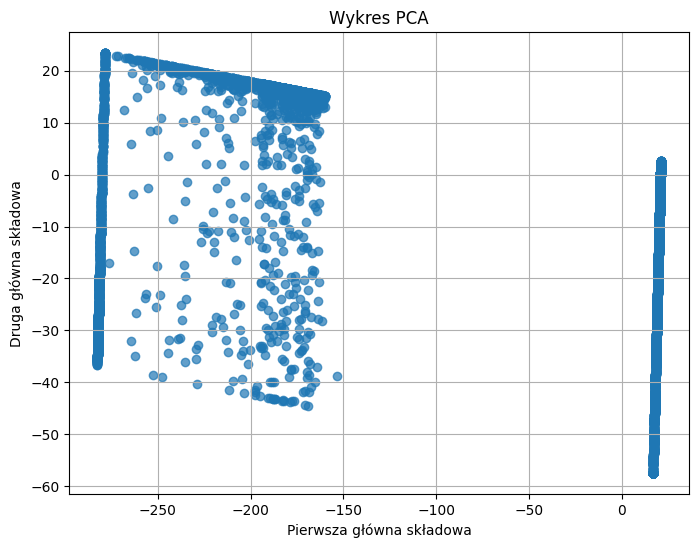

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Pierwsza główna składowa')
plt.ylabel('Druga główna składowa')
plt.title('Wykres PCA')
plt.grid(True)
plt.show()

In [ ]:
components = pca.components_

In [ ]:
feature_names = x_s_scaled_df.columns

In [ ]:
df_components = pd.DataFrame(components, columns=feature_names, index=[f'Component {i+1}' for i in range(components.shape[0])])

In [ ]:
pca_analiza = df_components.T
pca_analiza

,Component 1,Component 2,Component 3
loan_amnt_out,6.982086e-04,-0.001736,2.532862e-01
funded_amnt_out,6.603441e-04,-0.000905,2.444177e-01
funded_amnt_inv_out,2.040341e-03,0.016763,2.505712e-01
int_rate,-6.793166e-04,0.001459,2.577167e-01
installment_trans,4.641989e-04,-0.003199,2.480706e-01
grade_num,-1.477100e-03,-0.004761,2.400708e-01
dti,2.878013e-04,0.000998,4.030685e-02
delinq_2yrs,-2.320041e-04,-0.001537,1.792664e-02
inq_last_6mths_trans,-6.361054e-04,-0.003481,2.261218e-02
open_acc,4.043619e-06,-0.001929,4.524604e-02


In [ ]:
# Wyjaśnienie udziału zmiennych w poszczedgólnych składowych PCA
pca_analiza =  pca_analiza[(pca_analiza.abs() > 0.1)]
pca_analiza.dropna(axis = 0, how = 'all',  inplace = True)
pca_analiza

,Component 1,Component 2,Component 3
loan_amnt_out,NaN,NaN,0.253286
funded_amnt_out,NaN,NaN,0.244418
funded_amnt_inv_out,NaN,NaN,0.250571
int_rate,NaN,NaN,0.257717
installment_trans,NaN,NaN,0.248071
grade_num,NaN,NaN,0.240071
revol_bal_trans,NaN,NaN,0.131371
revol_util,NaN,NaN,0.105231
fico_value,NaN,NaN,-0.122613
mths_since_last_record,0.997558,NaN,NaN


Podział jednak jest dość dziwny, bo pierwsza główna składowa jest prawie całkowicie skorelowana z jedną zmienną  - mths_since_last_record

In [ ]:
X_pca_df= pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3'])

#### <a name = '44'></a> 4.4 Klasteryzacja

#### <a name = '441'></a> 4.4.1 Metoda K-Means

#### <a name = '4411'></a> 4.4.1 Utworzenie klastrów

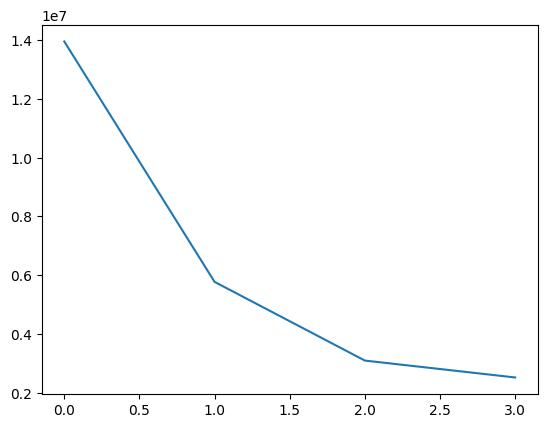

In [ ]:
# Wybór ilosci klastrów metodą łokcia
ssd = []
range_n_clusters  = [2, 3, 4, 5]
for num in range_n_clusters:
    kmeans = KMeans(n_clusters = num, max_iter = 1000,  random_state=42)
    #kmeans.fit(X_pca_df)
    kmeans.fit(x_s_scaled_df)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [ ]:
# Wybór ilosci klastrów metodą Silhouette
sss = []
range_n_clusters = [ 2,3, 4,5]
for num in range_n_clusters:
  kmeans = KMeans(n_clusters = num, max_iter = 1000)
  kmeans.fit(x_s_scaled_df)
  cluster_labels = kmeans.labels_
  silhouette_avg = silhouette_score(x_s_scaled_df, cluster_labels)
  print("For n_clusters={0}, the silhouette score is {1}".format(num, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9408207798329515
For n_clusters=3, the silhouette score is 0.9325646135068726
For n_clusters=4, the silhouette score is 0.8054206091109734
For n_clusters=5, the silhouette score is 0.7956009288584499


Optymalna ilość klastrów to 2 lub 3.

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter  = 1000, random_state = 42)
#kmeans.fit(X_pca_df)
kmeans.fit(x_s_scaled_df)

KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
data_clas['K_Means_Cluster_ID'] = kmeans.labels_

In [ ]:
data_clas.head()

,loan_amnt_out,funded_amnt_out,funded_amnt_inv_out,term,int_rate,installment_trans,grade_num,home_ownership,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths_trans,open_acc,pub_rec_bin,revol_bal_trans,revol_util,total_acc,pub_rec_bankruptcies,fico_value,mths_since_last_record,annual_inc_cat,emp_length_bin,mths_since_last_delinq,funded_to_loan_amnt_ratio,funded_income_ratio,age_of_credit_lin,funded_inv_to_tot_ratio,mth_inc,mth_install_to_incom,acc_hist,pub_rec_type,other_debt,mth_debt_installment,fico_int_rate,funded_amnt_fico,dti_ratio_per_grade,dti_ratio_per_purpose,mean_funded_addr_state,mean_annu_addr_state,mean_fico_addr_state,desc_len,consolidation,K_Means_Cluster_ID
0,5000.0,5000.0,4975.0,36 months,10.6,10.615785,1,RENT,Verified,1,credit_card,27.65,0.0,0.095073,3.0,1,46.867773,83.7,9.0,0.0,737.0,300.0,low-Q1,1,300.0,1.0,0.208333,26.9,0.995,2000.000000,0.081435,0.333333,rec_lack,55137.13,338.534598,69.528302,6.784261,13.39,14.67,10600,63716,714,12,0,0
1,2500.0,2500.0,2500.0,60 months,15.3,7.299603,2,RENT,Source Verified,0,car,1.00,0.0,1.561672,3.0,1,24.674708,9.4,4.0,0.0,742.0,300.0,low-Q1,1,300.0,1.0,0.083333,12.7,1.000,2500.000000,0.023932,0.750000,rec_lack,2440.17,40.785058,48.496732,3.369272,13.85,11.11,10900,65999,716,116,0,0
2,2400.0,2400.0,2400.0,36 months,16.0,8.340325,2,RENT,Not Verified,1,small_business,8.72,0.0,0.727709,2.0,1,29.429725,98.5,10.0,0.0,737.0,300.0,low_outlier,1,300.0,1.0,0.195886,10.1,1.000,1021.000000,0.082595,0.200000,rec_lack,8818.79,104.574766,46.062500,3.256445,13.85,11.24,11148,65289,714,1,0,0
3,10000.0,10000.0,10000.0,36 months,13.5,13.657660,2,RENT,Source Verified,1,other,20.00,0.0,0.095073,10.0,1,35.823940,21.0,37.0,0.0,692.0,300.0,Q1-Q2,1,35.0,1.0,0.203252,15.8,1.000,4100.000000,0.082759,0.270270,rec_lack,81660.69,240.666912,51.259259,14.450867,13.85,12.37,11007,68419,713,34,0,0
4,3000.0,3000.0,3000.0,60 months,12.7,7.667631,1,RENT,Source Verified,1,other,17.94,0.0,-2.447164,15.0,1,57.855367,53.9,38.0,0.0,697.0,300.0,Q2-Q3,1,38.0,1.0,0.037500,15.9,1.000,6666.666667,0.010169,0.394737,rec_lack,119532.21,1763.272017,54.881890,4.304161,13.39,12.37,10248,57307,713,56,0,0


In [ ]:
# Rozkład obserwacji w poszczególnych klastrach
print(f'Klaster 0: {data_clas[data_clas["K_Means_Cluster_ID"] == 0]["K_Means_Cluster_ID"].count()}')
print(f'Klaster 1: {data_clas[data_clas["K_Means_Cluster_ID"] == 1]["K_Means_Cluster_ID"].count()}')
print(f'Klaster 2: {data_clas[data_clas["K_Means_Cluster_ID"] == 2]["K_Means_Cluster_ID"].count()}')
print(f'Klaster 3 : {data_clas[data_clas["K_Means_Cluster_ID"] == 3]["K_Means_Cluster_ID"].count()}')


Klaster 0: 38880
Klaster 1: 1433
Klaster 2: 2218
Klaster 3 : 0


#### <a name = '4412'></a> 4.4.1.2 Analiza klastrów

In [ ]:
s_list_num = data_clas.select_dtypes(include = ['number']).columns.tolist()

In [ ]:
s_list_num

['loan_amnt_out',
 'funded_amnt_out',
 'funded_amnt_inv_out',
 'int_rate',
 'installment_trans',
 'grade_num',
 'loan_status',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths_trans',
 'open_acc',
 'pub_rec_bin',
 'revol_bal_trans',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'fico_value',
 'mths_since_last_record',
 'emp_length_bin',
 'mths_since_last_delinq',
 'funded_to_loan_amnt_ratio',
 'funded_income_ratio',
 'age_of_credit_lin',
 'funded_inv_to_tot_ratio',
 'mth_inc',
 'mth_install_to_incom',
 'acc_hist',
 'other_debt',
 'mth_debt_installment',
 'fico_int_rate',
 'funded_amnt_fico',
 'dti_ratio_per_grade',
 'dti_ratio_per_purpose',
 'mean_funded_addr_state',
 'mean_annu_addr_state',
 'mean_fico_addr_state',
 'desc_len',
 'consolidation',
 'K_Means_Cluster_ID']

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


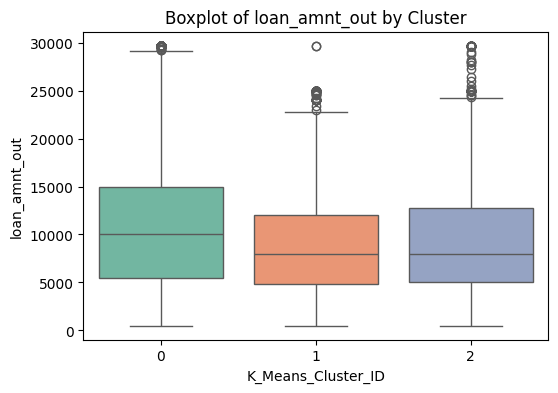

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


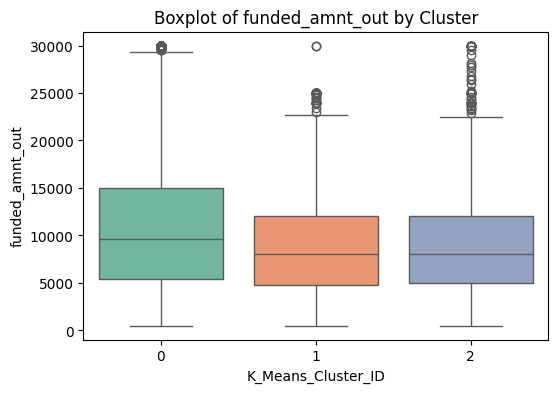

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


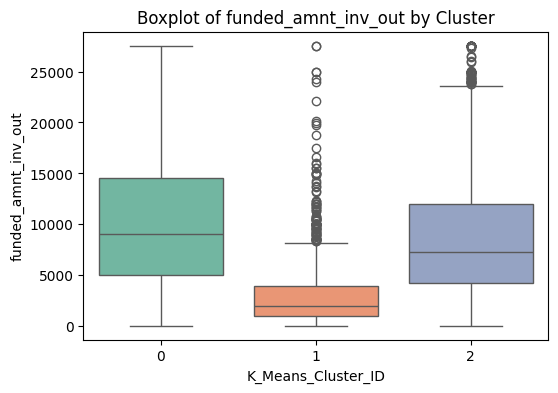

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


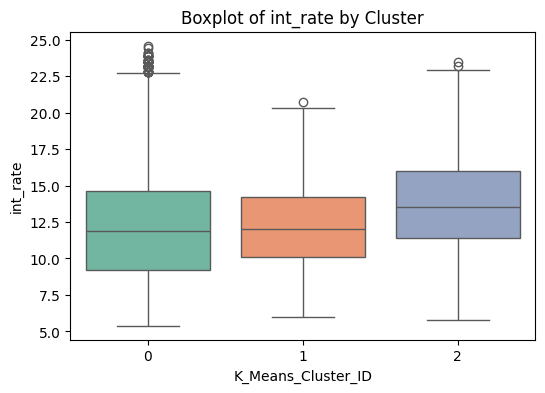

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


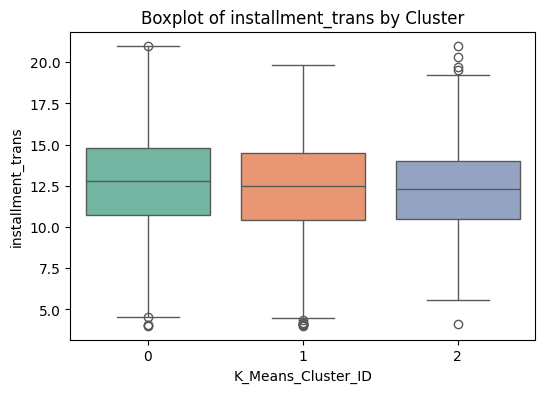

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


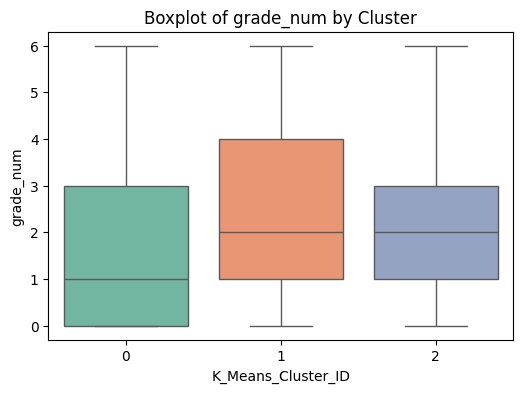

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


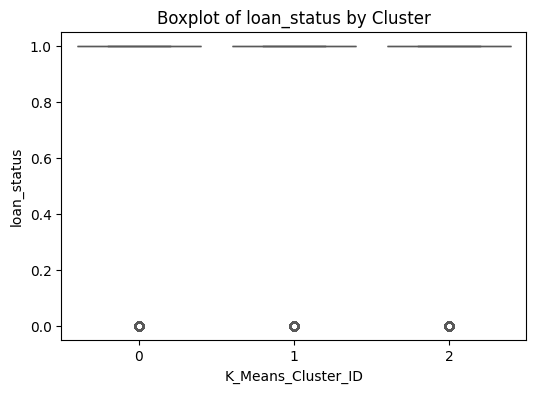

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


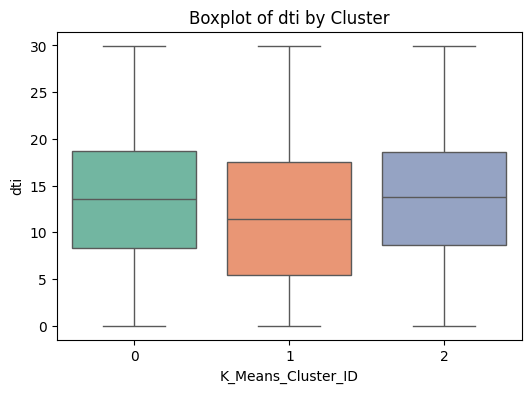

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


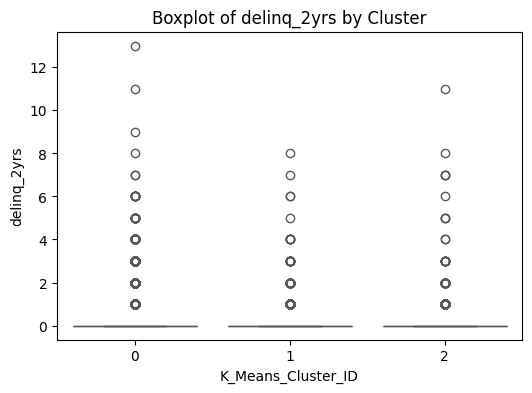

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


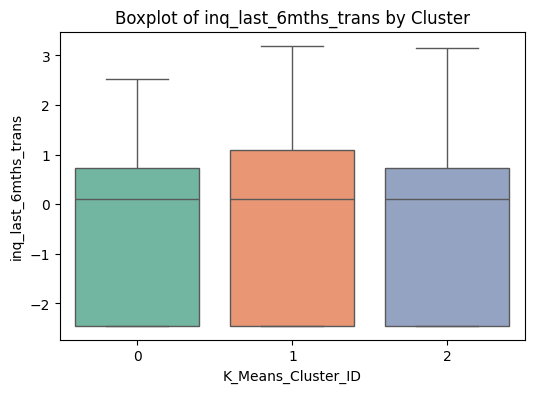

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


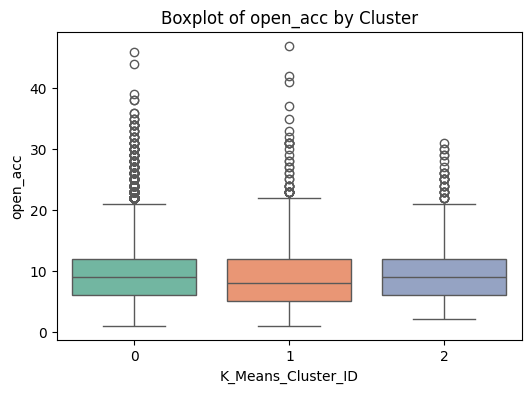

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


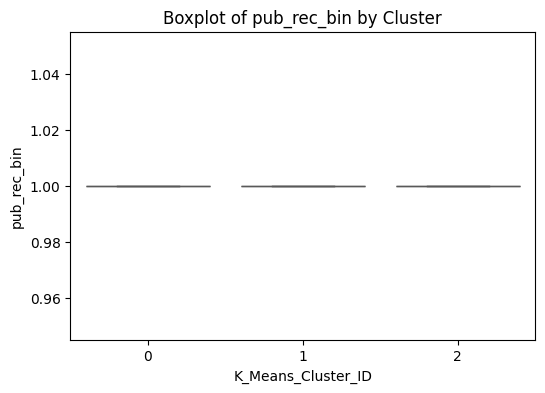

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


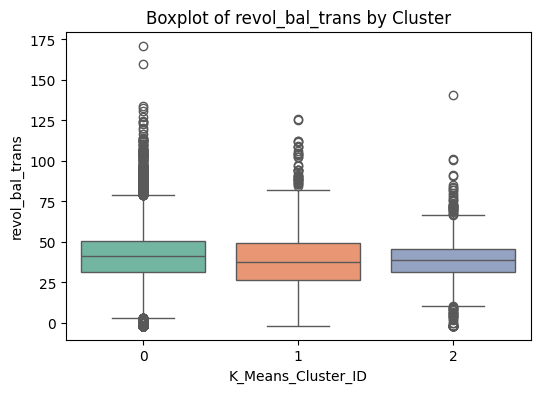

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


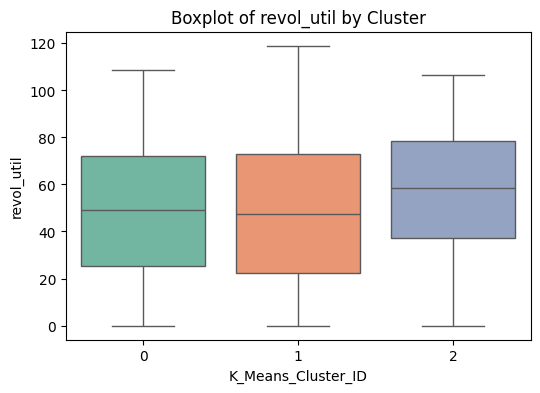

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


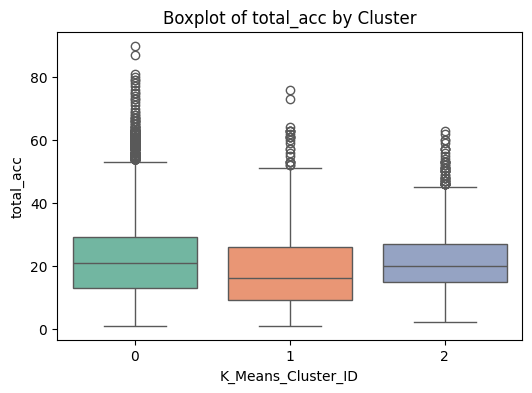

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


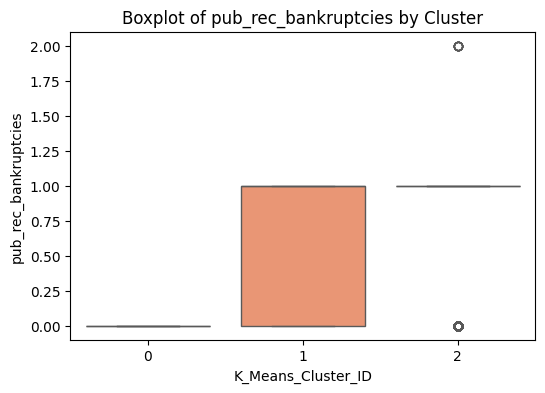

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


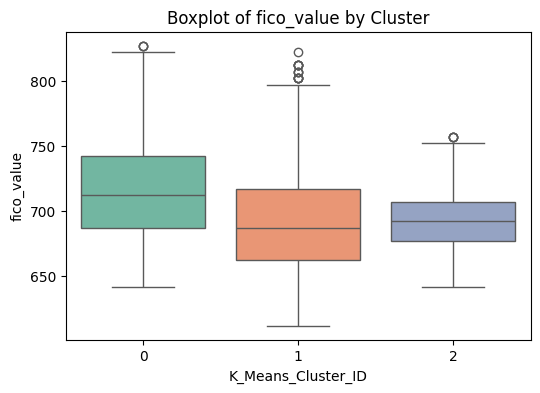

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


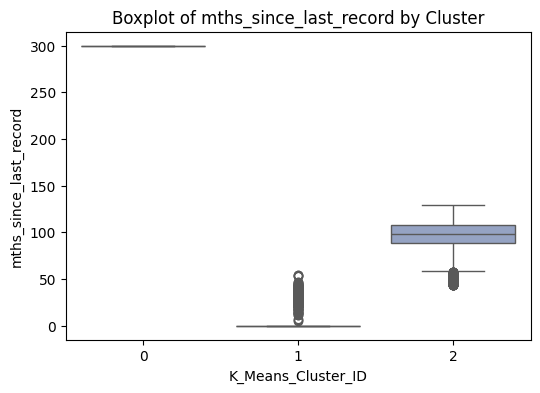

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


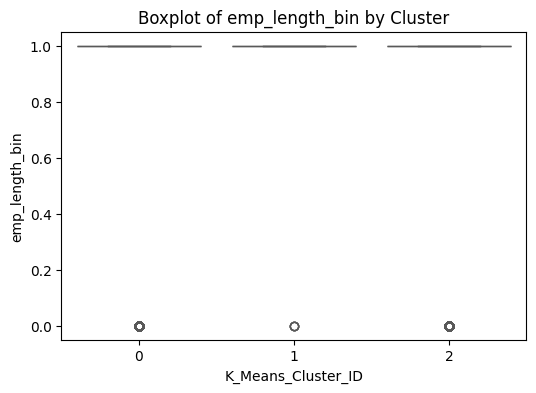

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


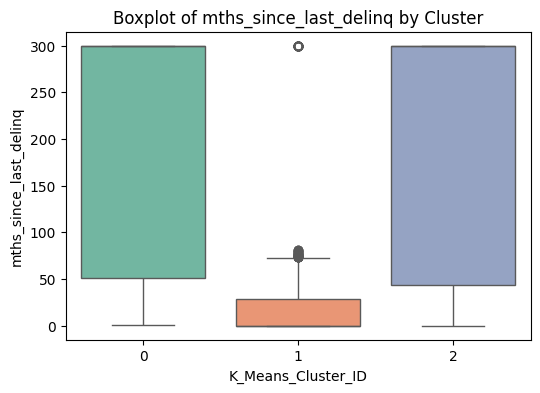

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


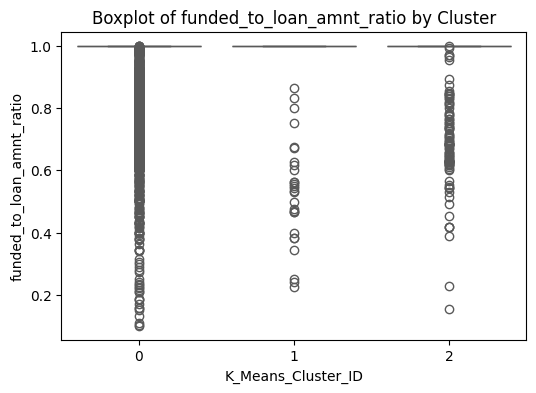

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


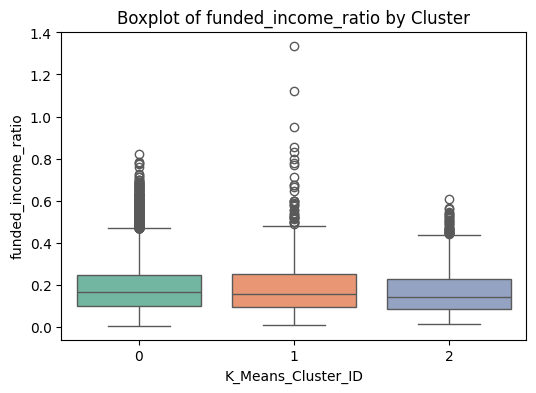

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


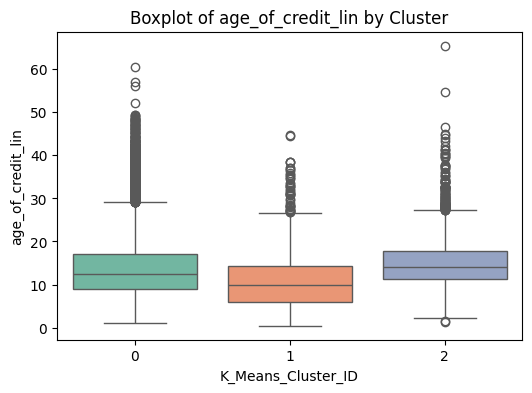

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


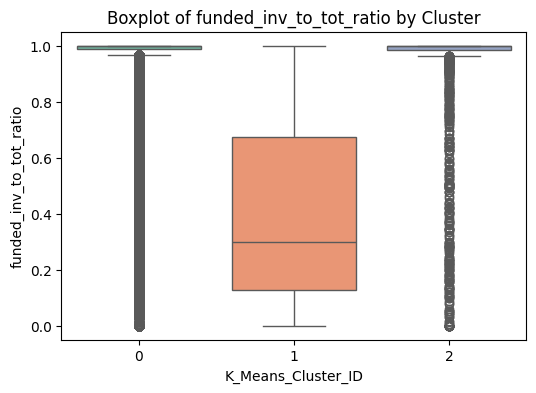

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


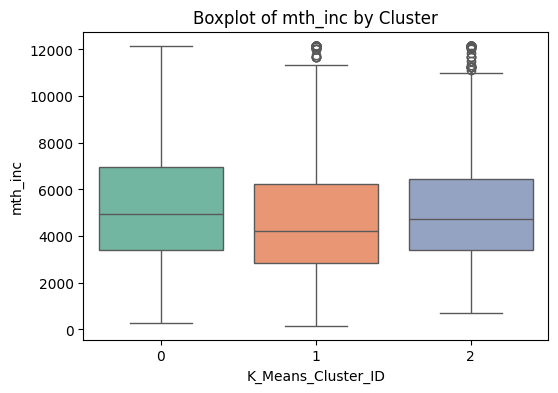

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


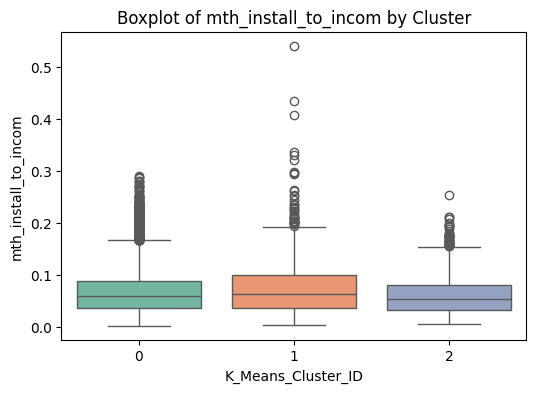

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


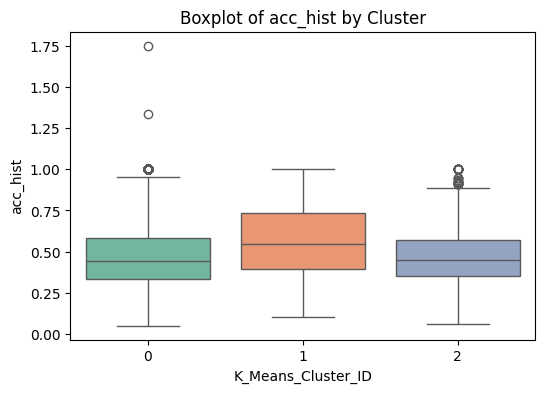

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


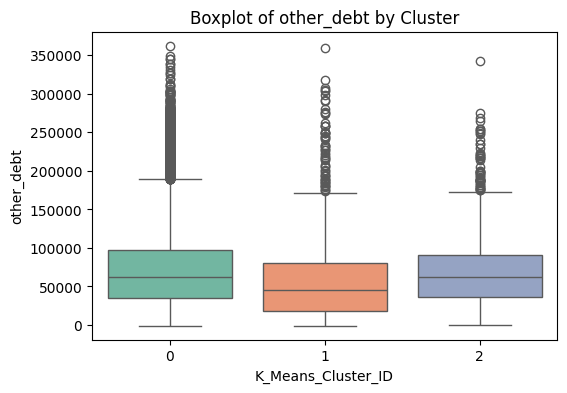

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


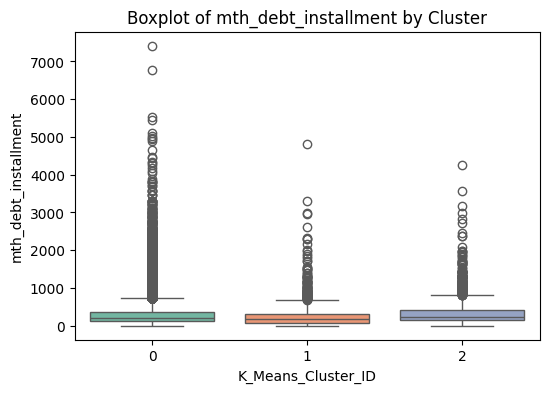

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


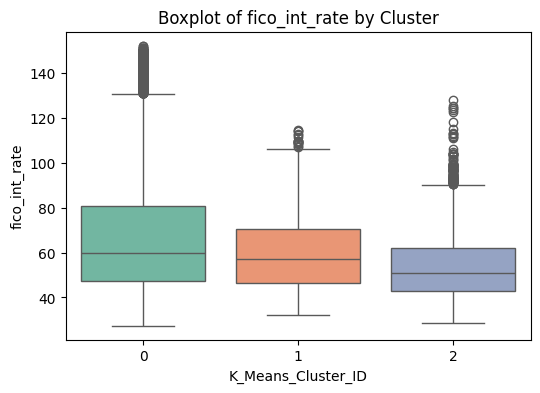

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


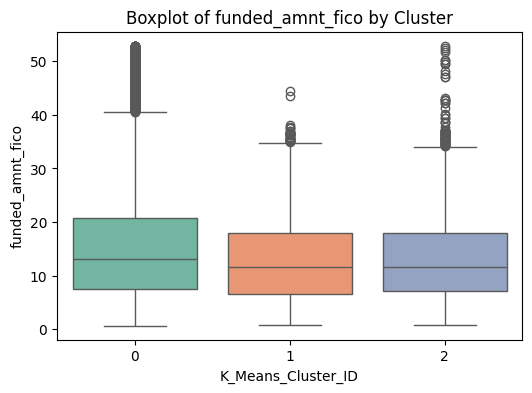

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


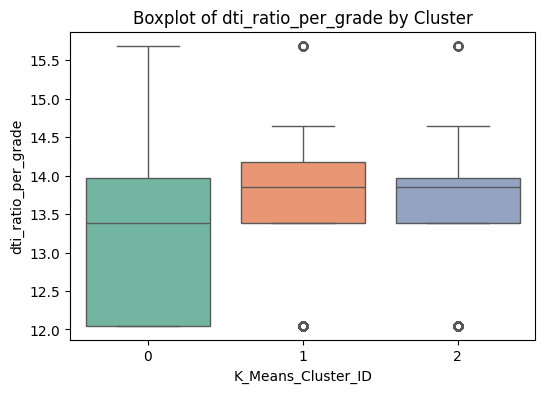

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


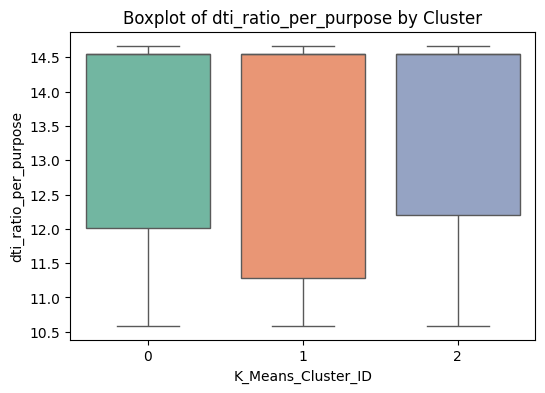

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


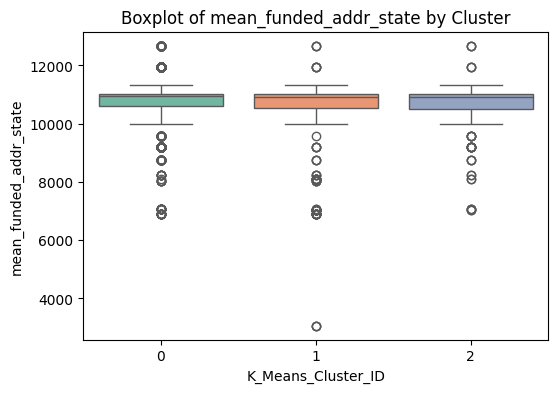

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


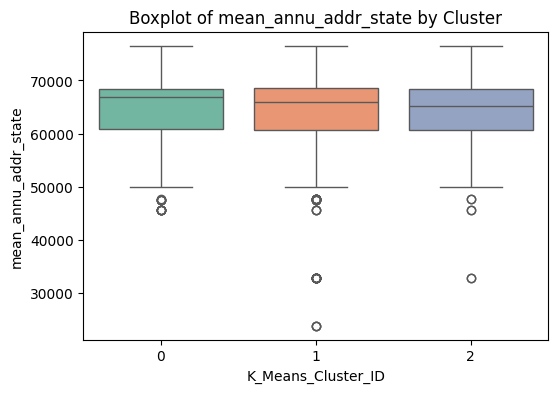

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


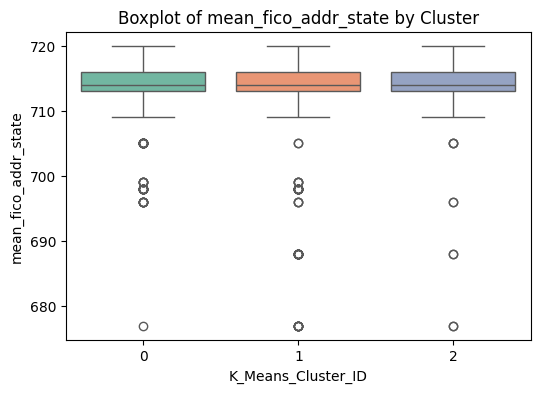

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


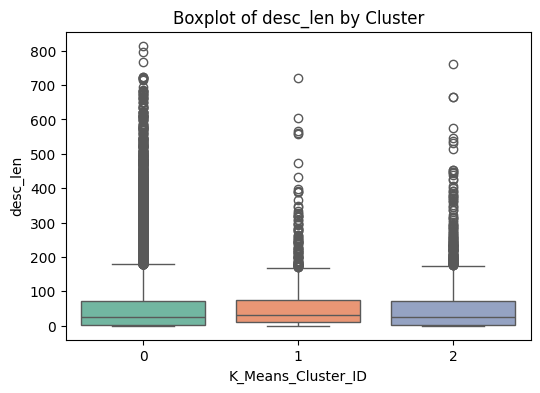

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


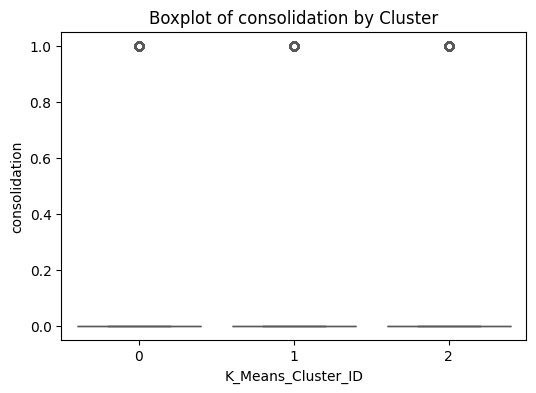

<ipython-input-89-231560bfffea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')


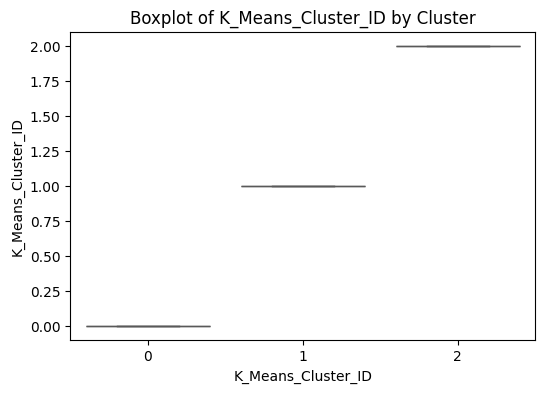

In [ ]:
for col in s_list_num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='K_Means_Cluster_ID', y=col, data=data_clas, palette='Set2')
    plt.title(f'Boxplot of {col} by Cluster')
    plt.show()

In [ ]:
x_s_columns_cat = data_clas.select_dtypes(include = ['object']).columns.tolist()

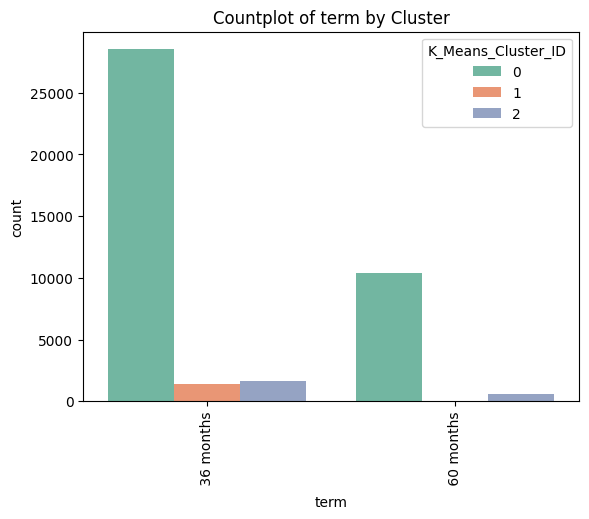

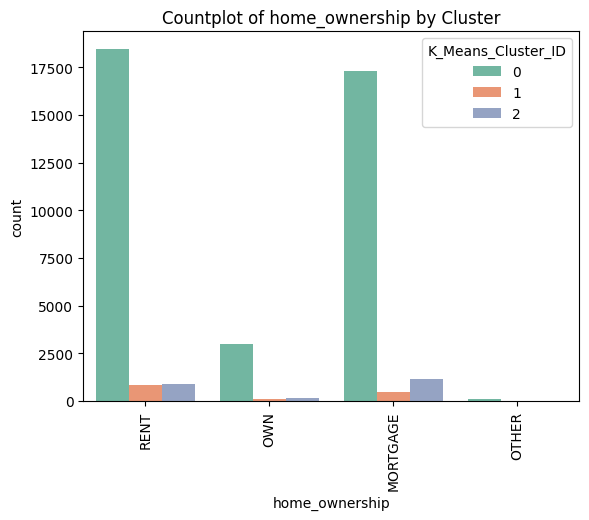

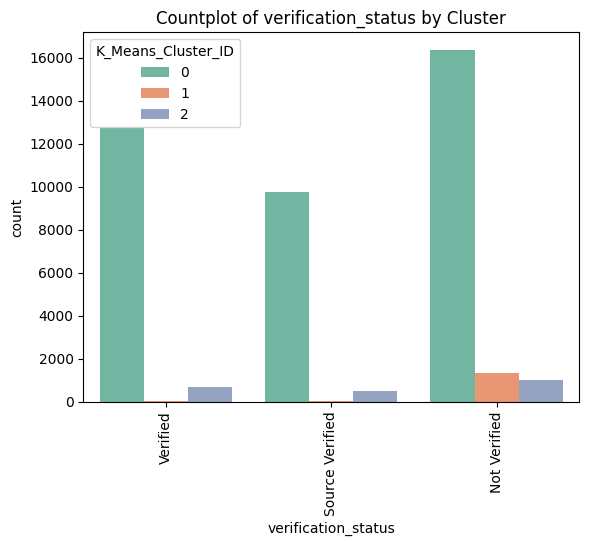

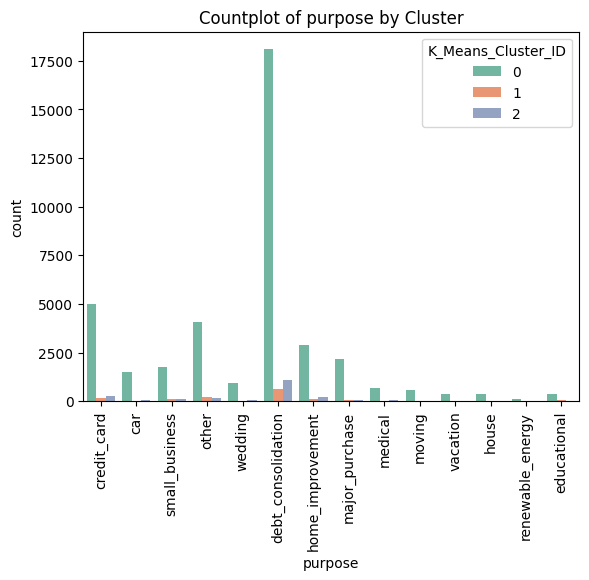

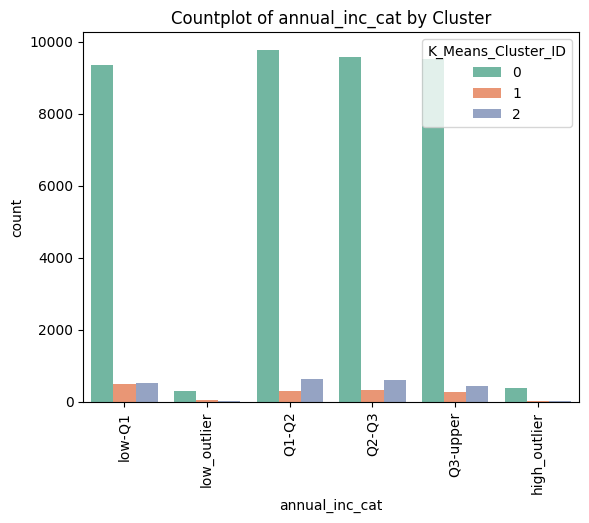

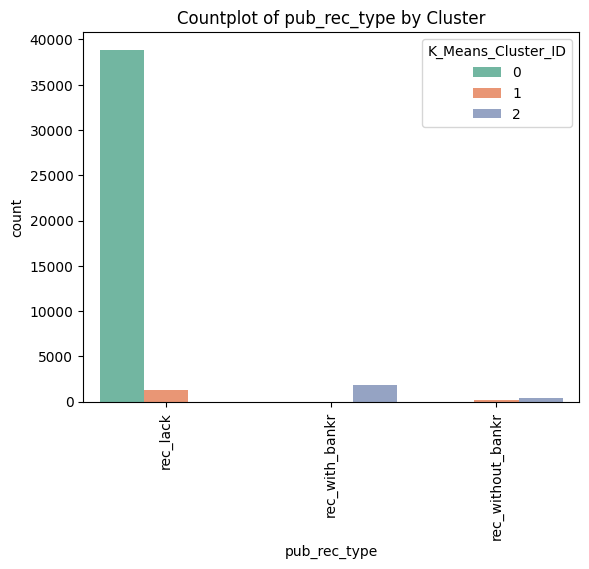

In [ ]:

for col in x_s_columns_cat:
  sns.countplot(x = col, hue = 'K_Means_Cluster_ID', data = data_clas, palette = 'Set2')
  plt.title(f'Countplot of {col} by Cluster')
  plt.xticks(rotation=90)
  plt.show()

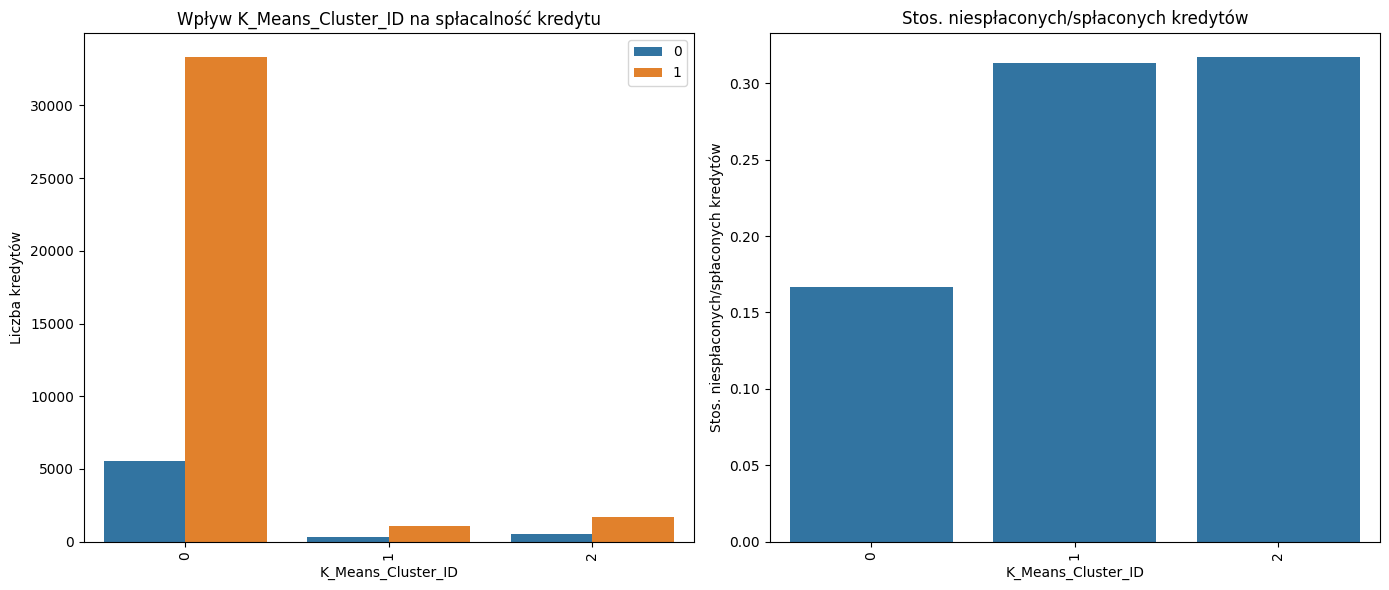

In [ ]:
# Obliczenie stosunku niespłaconych do spłaconych kredytów w klastrach
data_grouped = data_clas[['K_Means_Cluster_ID', 'loan_status']]
data_grouped = data_grouped.groupby(['K_Means_Cluster_ID', 'loan_status']).size()
df = data_grouped.reset_index()
df.columns = ['K_Means_Cluster_ID', 'loan_status', 'count']
    # Przekształcenie danych, aby obliczyć stosunek
pivot_df = df.pivot(index='K_Means_Cluster_ID', columns='loan_status', values='count')
   # Obliczanie stosunku 0/1
pivot_df['ratio'] = pivot_df[0] / pivot_df[1]
pivot_df = pivot_df.reset_index()

order = sorted(data_clas['K_Means_Cluster_ID'].unique())

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    # plt.figure(figsize=(10, 6))
sns.countplot(x='K_Means_Cluster_ID', hue='loan_status', data=data_clas, ax=axs[0], order=order)
axs[0].set_title(f'Wpływ K_Means_Cluster_ID na spłacalność kredytu')
axs[0].set_xlabel('K_Means_Cluster_ID')
axs[0].set_ylabel('Liczba kredytów')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend( labels=['0', '1'])

sns.barplot(x='K_Means_Cluster_ID', y='ratio', data=pivot_df, order=order)
axs[1].set_title('Stos. niespłaconych/spłaconych kredytów')
axs[1].set_xlabel('K_Means_Cluster_ID')
axs[1].set_ylabel('Stos. niespłaconych/spłaconych kredytów')
axs[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Klastry nie są zbalansowane pod względem ilości obserwacji.  
Zróżnicowanie zmiennych nie jest zbyt duże w klastrach, różnice są widoczne dla zmiennej:  
- ilość miesięcy od ostatniej zaległości - klaster 1 zawiera klientów których zaległość była najkrótsza, jednak pozostałe dwa klastry zawieraja rownież klientów z tego przedziału, nie jest to selektywny podział,  
- ilość miesięcy od ostatniego rejestru - klaster 0 - zawiera klientów niezgłoszonych, klaster 1 i 2 różnicuje klientów odpowiednio na takich którzy byli zgłoszenie stosunkowo niedawno i takich którzy byli zgłoszeni ale dawniej,  
- ilość zgłoszeń bakructwa - widać różnicę jedynie pomiędzy klastrem 0  i 2 gdzie odpowiednio występują klienci którzy nie zostali zgłoszeni i klienci z jednym zgłoszeniem, klaster 1 zawiera oba te typy klientów,  
- typ zgłoszenia  - klaster 0 zawiera klientów którzy nie zostali zgłoszeni, pozostałe dwa klastry są głównie związane z klientami wobec których mialo miejsce zgłoszenie - brak wyraźnego rozróżnienia na zgłoszenie związane z bankructwem lub nie.  
  
Nie widać wyraźnej różnicy pomiędzy klastrami w wartości stosunku spłaconych do niespłaconych kredytów.  
Zmienna nie zostaje włączona do danych.